### Imports

In [145]:
import os 
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report


# Read in Data

In [146]:

PATH = os.path.abspath(os.path.join(os.path.dirname("."), "Data"))
FINAL_DATA = os.path.join(PATH, "finaldataframecopy_wWeather.csv")

FINAL_DATA

'/Users/wrangamujadidi/Desktop/Capstone/capstone_opioid/Data/finaldataframecopy_wWeather.csv'

In [147]:
#insert the data into a DataFrame

data = pd.read_csv(FINAL_DATA)

In [148]:
#make sure the data loaded properly 

data.head()

,HexagonNumber,HexandMonth,Month,Under20,20to29,30to39,40to49,50to59,60to69,70andabove,...,MiscCals,OverdoseCalls,PropertyCalls,QOLCalls,TrafficCalls,ViolentCalls,AverageTemperature,AverageHumidity,AveragePrecipitation,Unemployment
0,1,1-1,1,0,0,0,0,0,0,0,...,0,0,0,5,5,0,37.4075,0.541429,0.00025,0.274
1,1,1-2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,37.4075,0.541429,0.00025,0.274
2,1,1-3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,37.4075,0.541429,0.00025,0.274
3,1,1-4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,37.4075,0.541429,0.00025,0.274
4,1,1-5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,37.4075,0.541429,0.00025,0.274


In [149]:
#Drop the columns for HexandMonth and TotalNarcan.  HEXandMonth is not needed and TotalNarcan may cause bias because
#the Narcan Administered already accounts for the TotalNarcan for the month. 

data = data.drop(['HexandMonth'], axis=1)
data = data.drop(['TotalNarcan'], axis=1)

In [150]:
data.columns

Index(['HexagonNumber', 'Month', 'Under20', '20to29', '30to39', '40to49',
       '50to59', '60to69', '70andabove', 'NarcanAdministered', 'Male',
       'Female', 'MPDCalls', 'FEMSCalls', 'MedicalCalls', 'MiscCals',
       'OverdoseCalls', 'PropertyCalls', 'QOLCalls', 'TrafficCalls',
       'ViolentCalls', 'AverageTemperature', 'AverageHumidity',
       'AveragePrecipitation', 'Unemployment'],
      dtype='object')

# Seperate the data into the features and the target

In [184]:
#load in the columns as features.  Deleted the HexagonNumber, ages, gender, weather and unemployment 
#because they were causing the model to be predictive and give us perfect scores 

features = data [[
   'Month','MPDCalls', 'FEMSCalls', 'MedicalCalls', 'MiscCals',
       'OverdoseCalls', 'PropertyCalls', 'QOLCalls', 'TrafficCalls',
       'ViolentCalls'
]]

X = features

y = data['NarcanAdministered']

print(X.shape)
print(y.shape)

(9444, 9)
(9444,)


In [185]:
list(features)

['MPDCalls',
 'FEMSCalls',
 'MedicalCalls',
 'MiscCals',
 'OverdoseCalls',
 'PropertyCalls',
 'QOLCalls',
 'TrafficCalls',
 'ViolentCalls']

### Creating the test/train split

In [186]:
#Create the test and train splits (80/20)

from sklearn.model_selection import train_test_split as tts 
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [187]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7555, 9), (1889, 9), (7555,), (1889,))

# Decision Tree Classifier

In [188]:
# Import the model form 
from sklearn.tree import DecisionTreeClassifier 

# Fit the Model
model = DecisionTreeClassifier() 
model.fit(X_test, y_test)

# Predict and report 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1565
          1       1.00      0.79      0.88       324

avg / total       0.97      0.96      0.96      1889



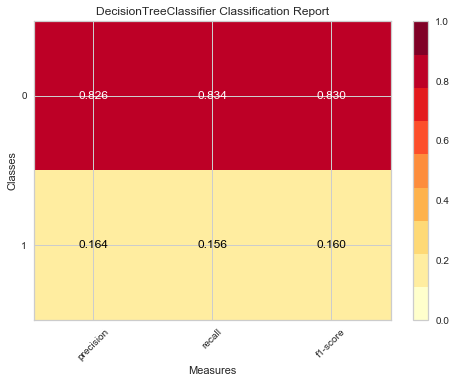

In [172]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [173]:
# Import the model form 
from sklearn.tree import DecisionTreeClassifier 

# Fit the Model
model = DecisionTreeClassifier(max_depth=10) 
model.fit(X_test, y_test)

# Predict and report 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



             precision    recall  f1-score   support

          0       0.87      1.00      0.93      1563
          1       0.98      0.29      0.45       326

avg / total       0.89      0.88      0.85      1889



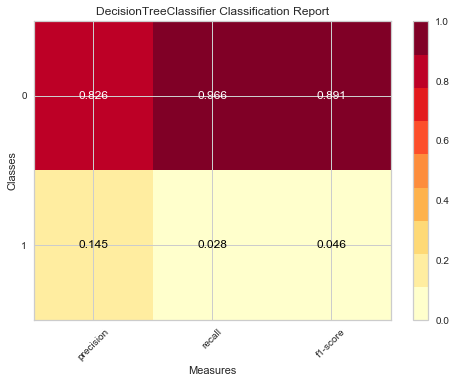

In [174]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# Regularization

## Lasso

In [175]:

"""Perform Regularization Techniques for feature selection"""

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SelectFromModel

model = Lasso(alpha=0.2)
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[('Month', 0.0), ('MPDCalls', 0.0), ('FEMSCalls', 0.0), ('MedicalCalls', 0.0), ('MiscCals', 0.0), ('OverdoseCalls', 0.0), ('PropertyCalls', -0.0), ('QOLCalls', 6.4883602392496e-05), ('TrafficCalls', 0.0), ('ViolentCalls', 0.0)]


In [176]:
model = Lasso(alpha=0.05)
sfm = SelectFromModel(model)
sfm.fit(X, y)
print(list(X[sfm.get_support(indices=True)]))

['PropertyCalls', 'QOLCalls']


## Ridge

In [177]:
model = Ridge()
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[('Month', 0.002614466572196494), ('MPDCalls', 0.0009904947976399898), ('FEMSCalls', 0.0012137583605246862), ('MedicalCalls', -0.0014476708015327977), ('MiscCals', -0.0010714520230508983), ('OverdoseCalls', 0.007340619247404985), ('PropertyCalls', -0.0022346651915442963), ('QOLCalls', -0.00038257806260807525), ('TrafficCalls', -0.00046305865928176733), ('ViolentCalls', 0.0004049087641970936)]


In [178]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(X, y)
print(list(X[sfm.get_support(indices=True)]))

['Month', 'OverdoseCalls', 'PropertyCalls']


## Elastic Net

In [179]:
model = ElasticNet(l1_ratio=0.10)
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[('Month', 0.0), ('MPDCalls', 0.0), ('FEMSCalls', 0.0), ('MedicalCalls', 0.0), ('MiscCals', -0.0), ('OverdoseCalls', 0.0), ('PropertyCalls', -0.0), ('QOLCalls', 9.850087747089478e-05), ('TrafficCalls', 0.0), ('ViolentCalls', 0.0)]


In [180]:
model = ElasticNet()
sfm = SelectFromModel(model)
sfm.fit(X, y)
print(list(X[sfm.get_support(indices=True)]))

['MPDCalls']


# Scores using the regularized data 

In [181]:
features = data [[
   'Month', 'OverdoseCalls', 'PropertyCalls'
]]

X = features

y = data['NarcanAdministered']

print(X.shape)
print(y.shape)

(9444, 3)
(9444,)


In [182]:
# Fit the Model
model = DecisionTreeClassifier() 
model.fit(X_test, y_test)

# Predict and report 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1563
          1       1.00      0.81      0.90       326

avg / total       0.97      0.97      0.97      1889



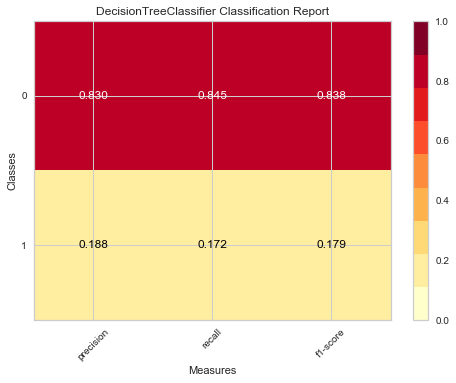

In [183]:
visualizer = ClassificationReport(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data